# Predictive Modeling of TATA Motors Stock Price Movements

Embark on a time series analysis project using a dataset with a time
component, specifically historical stock prices. The objective is to uncover
patterns, trends, and insights from the temporal data, enabling a better
understanding of stock price movements over time.

**Step -1 EDA (Exploratory Data analysis)**

In [1]:
# Import Important Library for Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
tata = pd.read_csv('Tata_Motors_Ltd._historical_data.csv')

In [3]:
#lets display the top dataset
tata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,43.5,43.5,43.5,43.5,16.114737,0
1,2000-01-04,43.5,43.5,43.5,43.5,16.114737,0
2,2000-01-05,43.5,43.5,43.5,43.5,16.114737,0
3,2000-01-06,43.5,43.5,43.5,43.5,16.114737,0
4,2000-01-07,43.5,43.5,43.5,43.5,16.114737,0


In [4]:
#lets display the down dataset
tata.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5881,2023-08-28,606.299988,608.400024,601.549988,602.200012,602.200012,1317553
5882,2023-08-29,604.900024,610.549988,603.000000,606.549988,606.549988,524651
5883,2023-08-30,611.200012,613.000000,604.799988,605.549988,605.549988,523411
5884,2023-08-31,608.049988,609.650024,599.099976,601.099976,601.099976,1242644
5885,2023-09-01,603.549988,614.799988,601.650024,611.200012,611.200012,1454215


In [5]:
#check the missing value in dataset
tata.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This implies that there are no null values in the data set provided.

In [6]:
#check the duplicates in the dataset
tata.duplicated().sum()

0

This implies that there are no duplicates values in the data set provided.

In [7]:
#check the data types
tata.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
#describe the datasets
tata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5.886000e+03
mean,219.050581,222.092077,215.580924,218.658936,201.175923,2.586247e+06
std,161.660368,163.654766,159.364258,161.370974,172.828015,4.579995e+06
min,12.049999,12.049999,12.049999,12.049999,4.463967,0.000000e+00
25%,85.247496,86.092497,84.267500,85.125002,42.817844,5.867780e+05
50%,171.600006,174.800003,168.654999,171.375000,150.500000,1.398945e+06
75%,350.437492,358.075005,344.650002,352.274994,352.189270,3.121360e+06
max,646.200012,665.299988,639.000000,640.599976,640.599976,2.190277e+08


In [9]:
#Information about the data sets
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886 entries, 0 to 5885
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5886 non-null   object 
 1   Open       5886 non-null   float64
 2   High       5886 non-null   float64
 3   Low        5886 non-null   float64
 4   Close      5886 non-null   float64
 5   Adj Close  5886 non-null   float64
 6   Volume     5886 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 322.0+ KB


In [10]:
#lets check the row and column
tata.shape

(5886, 7)

From this, we got to know that there are 5886 rows of data available and for each row, we have 7 different features or columns.

In [11]:
#lets check the Close and Adj close column contain same value or not
tata[tata['Close'] == tata['Adj Close']].shape

(1742, 7)

From here we can conclude that some of the rows of columns ‘Close’ and ‘Adj Close’ have the same data.

The columns Close and Adj Close represent the closing price and the adjusted closing price of the stock on a given date, respectively. The adjusted closing price accounts for dividends and splits, which may affect the stock price over time. Therefore, the adjusted closing price is more accurate and consistent than the closing price, and it reflects the true value of the stock.

I want to analyze or model the stock price, we should use the Adj Close column, as it will give me more reliable and realistic results. So I can drop the Close column, as it is redundant and may introduce noise or errors in my analysis or model.

In [12]:
# Drop the "Close" column from the datasets

tata = tata.drop(['Close'], axis = 1)
tata

,Date,Open,High,Low,Adj Close,Volume
0,2000-01-03,43.500000,43.500000,43.500000,16.114737,0
1,2000-01-04,43.500000,43.500000,43.500000,16.114737,0
2,2000-01-05,43.500000,43.500000,43.500000,16.114737,0
3,2000-01-06,43.500000,43.500000,43.500000,16.114737,0
4,2000-01-07,43.500000,43.500000,43.500000,16.114737,0
...,...,...,...,...,...,...
5881,2023-08-28,606.299988,608.400024,601.549988,602.200012,1317553
5882,2023-08-29,604.900024,610.549988,603.000000,606.549988,524651
5883,2023-08-30,611.200012,613.000000,604.799988,605.549988,523411
5884,2023-08-31,608.049988,609.650024,599.099976,601.099976,1242644


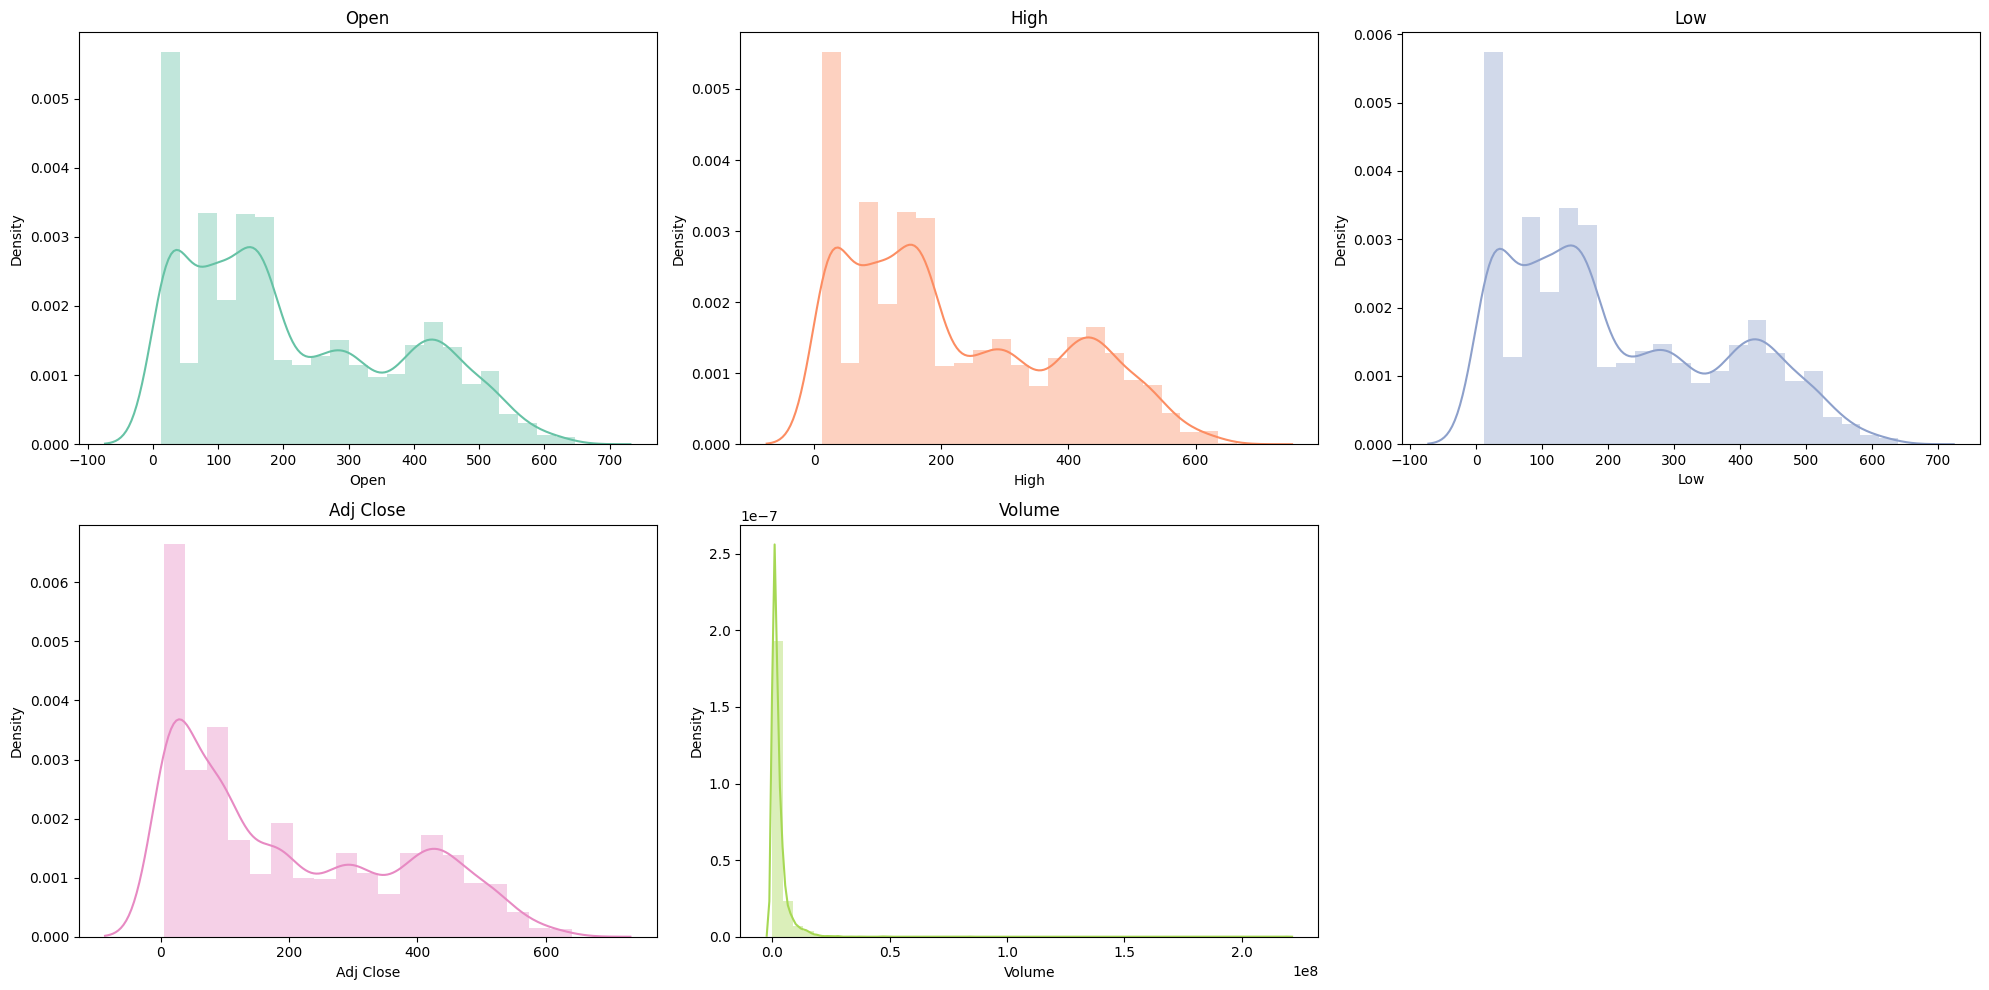

In [15]:
# Define features to plot
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

# Create a figure and a grid of subplots with 2 rows and 3 columns
fig, ax = plt.subplots(2, 3, figsize=(20,10))

# Define a color palette
palette = sns.color_palette("Set2")

# Loop through each feature and plot its distribution
for i, col in enumerate(features):
    # Get the subplot in the ith position
    axi = ax.flatten()[i]
    # Plot the distribution of the feature using seaborn
    sns.distplot(tata[col], color=palette[i], ax=axi)
    # Add a title and a label for the subplot
    axi.set_title(col)
    axi.set_xlabel(col)

# Remove the empty subplot
plt.delaxes(ax[1,2])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

Each graph shows fluctuations in these values over time.

1. **Open Price Graph:** This graph shows the opening prices of the stock over time. It has a significant peak around the 150 value, which means that most of the stocks opened at this price. The distribution is slightly skewed to the right, which means that there are some outliers with higher opening prices.

2. **High Price Graph:** This graph represents the highest prices reached by the stock over time. It has a prominent peak around 150 as well, which indicates that most of the stocks reached this price at some point during the trading session. The distribution is also skewed to the right, which suggests that there are some stocks that had much higher prices than the rest.

3. **Low Price Graph:** This graph depicts the lowest prices of the stock over time. It has a peak around 150, which means that most of the stocks did not go below this price. The distribution is slightly skewed to the left, which means that there are some outliers with lower prices.

4. **Adjusted Close Price Graph:** This graph shows the adjusted closing prices of the stock over time. It has a noticeable peak around 150, which means that most of the stocks closed at this price. The distribution is symmetric, which means that the mean, median, and mode are equal. This implies that the closing prices are not affected by extreme values or skewness.

5. **Volume Graph:** This graph indicates the trading volume of the stock over time. It has a sharp peak at the beginning followed by a drastic drop. This means that there was a lot of trading activity in the first few days, but then it decreased significantly. This could be due to various factors, such as market trends, news, events, or demand and supply.upply.

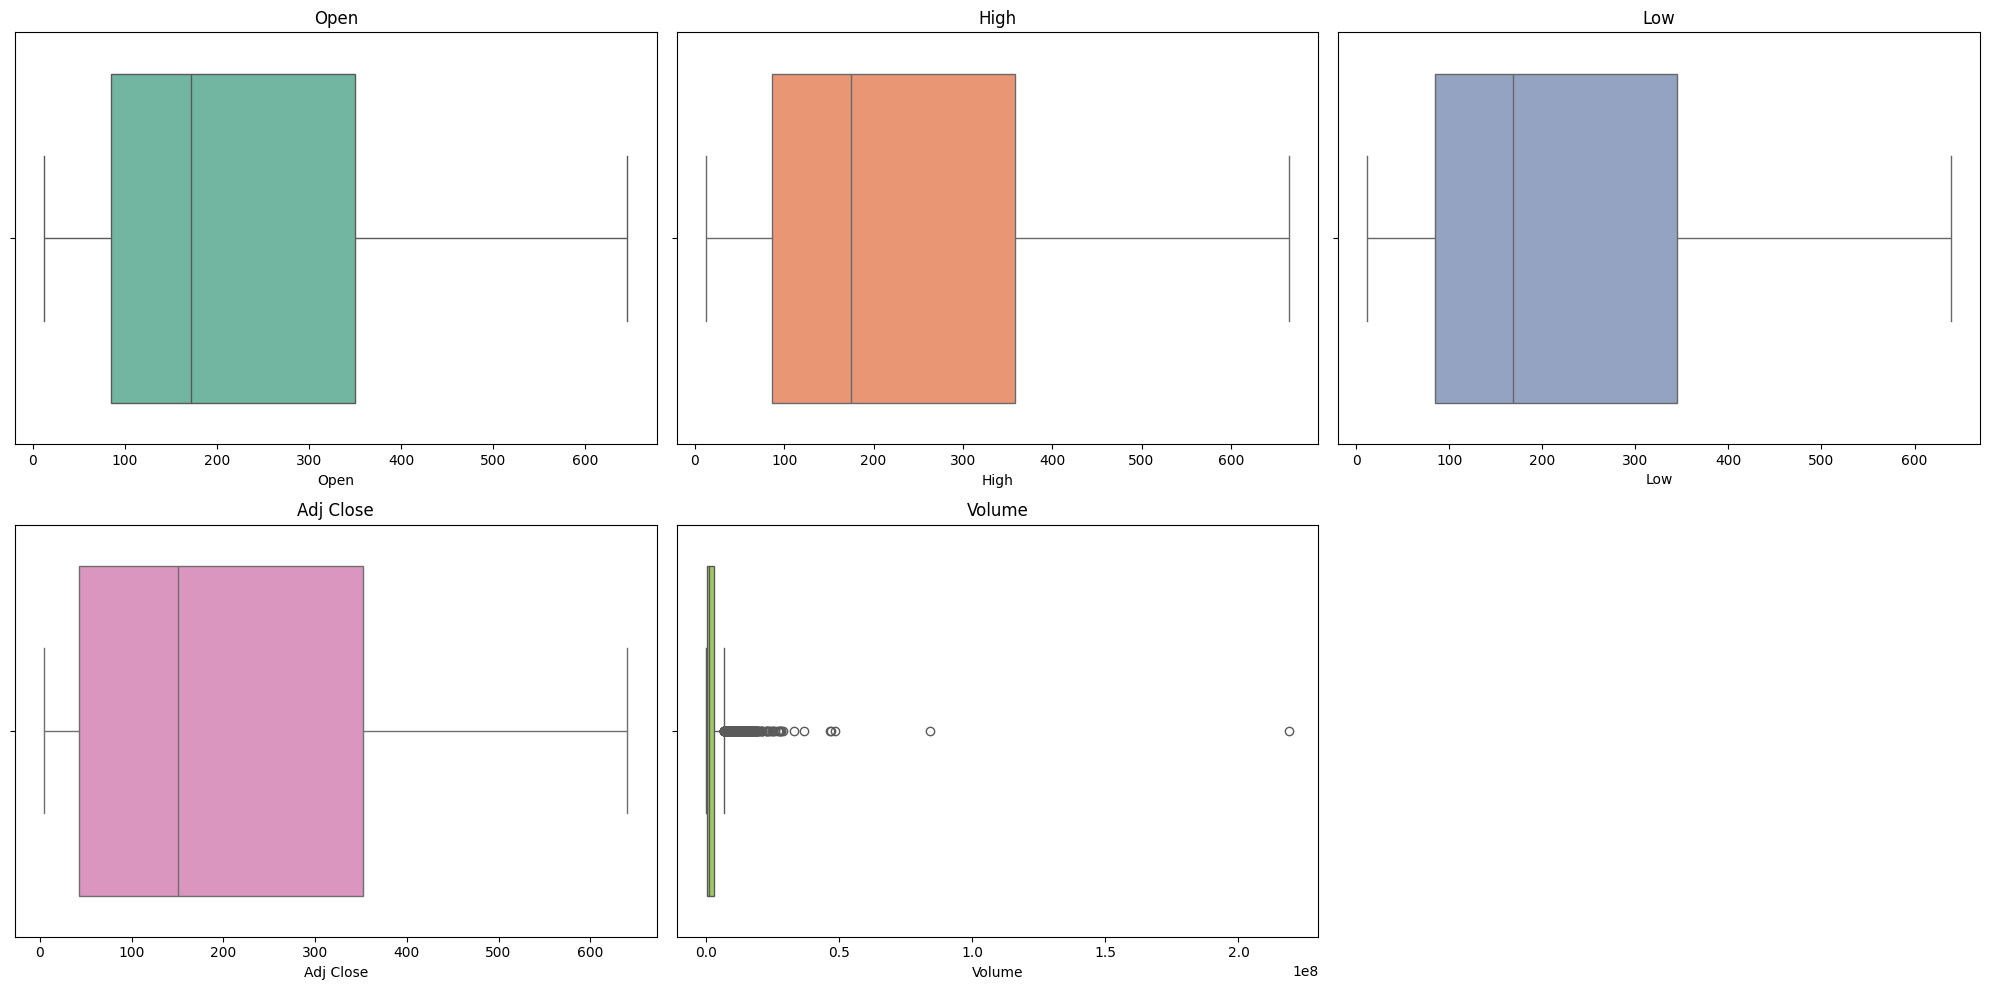

In [16]:
# Define features to plot
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

# Create a figure and a grid of subplots with 2 rows and 3 columns
fig, ax = plt.subplots(2, 3, figsize=(20,10))

# Define a color palette
palette = sns.color_palette("Set2")

# Loop through each feature and plot its distribution
for i, col in enumerate(features):
    # Get the subplot in the ith position
    axi = ax.flatten()[i]
    # Plot the distribution of the feature using seaborn
    sns.boxplot(x=col, y=None, data=tata, color=palette[i], ax=axi)
    # Add a title and a label for the subplot
    axi.set_title(col)
    axi.set_xlabel(col)

# Remove the empty subplot
plt.delaxes(ax[1,2])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()